### 1. 프로젝트 목표 및 가설 설정
   - 분석 목표 정의: 두 캠페인(Control/Test) 중 어떤 것이 더 나은 성과를 내는지 구체적인 목표(예: 구매 전환율 극대화)를 명시합니다.
   - 가설 수립:
       - 귀무가설(H0): 두 캠페인 간 성과(예: 구매 전환율)에 차이가 없다.
       - 대립가설(H1): 두 캠페인 간 성과에 유의미한 차이가 있다.

### 2. 데이터 준비
   - 라이브러리 로드: pandas, numpy 등 데이터 처리에 필요한 라이브러리를 불러옵니다.
   - 데이터 로드: control_group.csv와 test_group.csv 파일을 각각 데이터프레임으로 읽어옵니다.

#### 📊 데이터 설명

| 컬럼명 | 설명 |
|--------|------|
| `campaign_name` | 캠페인 이름 (Control / Test) |
| `date` | 일자 |
| `spent` | 광고 지출 비용 ($) |
| `impressions` | 광고 노출 수 |
| `reach` | 고유 노출 수 |
| `website_clicks` | 웹사이트 클릭 수 |
| `searches` | 웹사이트 내 검색 수 |
| `view_content` | 콘텐츠 조회 수 |
| `add_to_cart` | 장바구니 추가 수 |
| `purchases` | 구매 건수 |

In [91]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# dataframe 전처리
# 컬럼명
column_name = ['campaign_name', 'date', 'spend', 'impression', 'reach', 'click', 'search', 'view', 'cart', 'purchase']

def make_df(base_url):
    df = pd.read_csv(base_url, sep=";")
    df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
    df.columns = column_name
    df['campaign_name'] = df['campaign_name'].str.replace(" Campaign", "").str.lower()
    df.head()
    return df

In [93]:
# control, test
control_df = make_df('control_group.csv')
test_df = make_df('test_group.csv')

### 3. 데이터 전처리 및 EDA
 - 데이터 정제:
   - 두 데이터프레임을 하나로 통합
   - 컬럼 이름을 더 다루기 쉬운 형태(예: snake_case)로
     변경합니다.
   - 결측치가 있는지 확인하고 적절한 방법(예: 0으로 채우기)으로
     처리합니다.
   - 각 컬럼의 데이터 타입을 확인하고 필요시 변환합니다.       
 - 기초 통계 분석:
     - 각 그룹(Control/Test)별 데이터의 기초 통계량(평균, 중앙값,         표준편차 등)을 확인하여 데이터 분포를 파악합니다.

In [94]:
# control_df에 impression, reach, click, search, view, cart, purchase에 1개의 결측값 존재
print(control_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_name  30 non-null     object        
 1   date           30 non-null     datetime64[ns]
 2   spend          30 non-null     int64         
 3   impression     29 non-null     float64       
 4   reach          29 non-null     float64       
 5   click          29 non-null     float64       
 6   search         29 non-null     float64       
 7   view           29 non-null     float64       
 8   cart           29 non-null     float64       
 9   purchase       29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB
None


In [95]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_name  30 non-null     object        
 1   date           30 non-null     datetime64[ns]
 2   spend          30 non-null     int64         
 3   impression     30 non-null     int64         
 4   reach          30 non-null     int64         
 5   click          30 non-null     int64         
 6   search         30 non-null     int64         
 7   view           30 non-null     int64         
 8   cart           30 non-null     int64         
 9   purchase       30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB
None


#### 민감도 분석
분석 과정에서의 선택이 결과에 얼마나 영향을 미치는지 알아보는 분석  
- 결과가 견고: 결론이 동일하게 유지되는 경우
- 결과가 민감: 결론이 특정 조건에서만 나타나는 것

1. 시나리오 1: 결측 해당 행 삭제
2. 시나리오 2: 중앙값 대체
3. 시나리오 3: 평균 대체

위 시나리오 모두에 동일한 결론이 나온다면 이 분석이 매우 신뢰할 수 있다고 말할 수 있다.  

In [96]:
# control, test 둘다 동일 월에 진행이 됬는지 확인
print(set(control_df['date']) - set(test_df['date']))
print(set(test_df['date']) - set(control_df['date']))

set()
set()


In [97]:
# 시나리오 1
# 결측값 행 삭제
print(control_df[control_df.isnull().any(axis=1)])
print('-' * 60)
print(test_df[test_df['date'] == '2019-08-05'])

  campaign_name       date  spend  impression  reach  click  search  view  \
4       control 2019-08-05   1835         NaN    NaN    NaN     NaN   NaN   

   cart  purchase  
4   NaN       NaN  
------------------------------------------------------------
  campaign_name       date  spend  impression  reach  click  search  view  \
4          test 2019-08-05   2297      114295  95138   5863    2106   858   

   cart  purchase  
4   956       768  


In [98]:
# 시나리오 1 통합 데이터
missing_drop_df = pd.concat([control_df, test_df], axis=0, ignore_index=True)
missing_drop_df = missing_drop_df[missing_drop_df['date'] != '2019-08-05'].sort_values(by='date').reset_index(drop=True)
missing_drop_df.head()

,campaign_name,date,spend,impression,reach,click,search,view,cart,purchase
0,control,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,test,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,control,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
3,test,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
4,control,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


In [99]:
# 시나리오 2
# ➜ control group date별 각각의 지표들의 통계치가 어떻게 됬는지 확인
# 수치형 컬럼만 선택
num_cols = control_df.select_dtypes(include="number").columns.drop("date", errors="ignore")

# 시나리오 2 통합 데이터
# 결측값 평균치 대체
missing_mean_df = pd.concat([control_df.fillna(control_df[num_cols].mean()), test_df], axis=0, ignore_index=True) \
    .sort_values(by='date').reset_index(drop=True)

In [100]:
# 시나리오 3 통합 데이터
# 결측값 중앙값 대체
missing_median_df = pd.concat([control_df.fillna(control_df[num_cols].median()), test_df], axis=0, ignore_index=True) \
    .sort_values(by='date').reset_index(drop=True)

In [101]:
# 총 데이터 개수 출력
dfs = {
    "missing_drop_df": missing_drop_df,
    "missing_mean_df": missing_mean_df,
    "missing_median_df": missing_median_df
}

for name, df in dfs.items():
    control = len(df[df['campaign_name'] == 'control'])
    test = len(df[df['campaign_name'] == 'test'])
    
    print(f'{name}: control={control}, test={test}, all={df.shape}')

missing_drop_df: control=29, test=29, all=(58, 10)
missing_mean_df: control=30, test=30, all=(60, 10)
missing_median_df: control=30, test=30, all=(60, 10)


### 4. 핵심 성과 지표(KPI) 정의 및 비교
- 지표 계산:
    - 클릭률 (CTR: Click-Through Rate)
    - 구매당 비용 (CPA: Cost Per Acquisition)
    - 클릭당 비용 (CPC: Cost Per Click)
    - 구매 전환율 (Purchase Conversion Rate)
- 지표 비교:
    - 위에서 계산한 핵심 지표들을 그룹별로 비교하여 어느        
        캠페인이 수치상 우위에 있는지 확인합니다.
    - 시각화(예: 막대그래프)를 통해 차이를 명확하게 보여줍니다.

In [102]:
# 마케팅 기간
print(f"{missing_mean_df.date.min()} ~ {missing_mean_df.date.max()}")

2019-08-01 00:00:00 ~ 2019-08-30 00:00:00


In [103]:
missing_mean_df.columns

Index(['campaign_name', 'date', 'spend', 'impression', 'reach', 'click',
       'search', 'view', 'cart', 'purchase'],
      dtype='object')

In [104]:
missing_mean_df.head()

,campaign_name,date,spend,impression,reach,click,search,view,cart,purchase
0,control,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,test,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,control,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
3,test,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
4,control,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


#### 광고지표
- CTR(Click Through Rate): click / impression
- CPC(Cost Per Click): spend / click
- CPM(Cost Per Mile): spend / impression * 1000
- CPA(Cost Per Action): spend / purchase

In [105]:
missing_mean_df.head()

,campaign_name,date,spend,impression,reach,click,search,view,cart,purchase
0,control,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,test,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,control,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
3,test,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
4,control,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


In [106]:
# 광고 지표 계산
def calc_ad_metrics(df):
    df = df[['campaign_name','date','spend','impression', 'click','purchase']].copy()
    
    # 전환율 계산
    df['ctr'] = df['click'] / df['impression'] * 100  
    df['cpc'] = df['spend'] / df['click']
    df['cpm'] = df['spend'] / df['impression'] * 1000
    df['cpa'] = df['spend'] / df['purchase']
    
    return df

In [107]:
df = calc_ad_metrics(missing_mean_df)
df.head()

,campaign_name,date,spend,impression,click,purchase,ctr,cpc,cpm,cpa
0,control,2019-08-01,2280,82702.0,7016.0,618.0,8.483471,0.324971,27.568862,3.689320
1,test,2019-08-01,3008,39550.0,3038.0,255.0,7.681416,0.990125,76.055626,11.796078
2,control,2019-08-02,1757,121040.0,8110.0,511.0,6.700264,0.216646,14.515863,3.438356
3,test,2019-08-02,2542,100719.0,4657.0,677.0,4.623755,0.545845,25.238535,3.754801
4,control,2019-08-03,2343,131711.0,6508.0,372.0,4.941121,0.360018,17.788947,6.298387


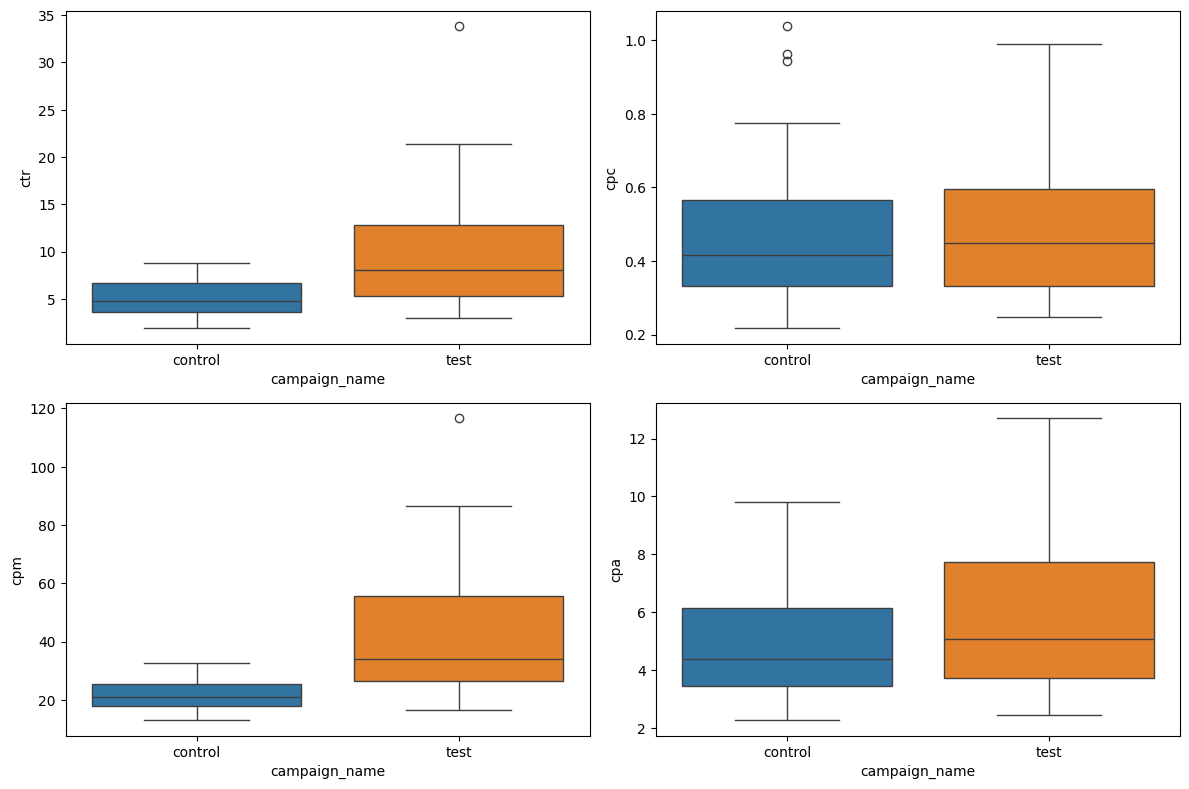

In [108]:
# Control = 파랑, Test = 빨강
palette = {"control": "blue", "test": "red"}

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x='campaign_name', y='ctr', data=df, ax=axes[0,0], hue='campaign_name')
sns.boxplot(x='campaign_name', y='cpc', data=df, ax=axes[0,1], hue='campaign_name')
sns.boxplot(x='campaign_name', y='cpm', data=df, ax=axes[1,0], hue='campaign_name')
sns.boxplot(x='campaign_name', y='cpa', data=df, ax=axes[1,1], hue='campaign_name')

plt.tight_layout()
plt.show()

#### 📊 광고 캠페인 성과 비교 (Control vs Test)

##### 1. CTR (클릭률, 왼쪽 위)
- **Control**: 중앙값 약 5%  
- **Test**: 중앙값 약 8~9%, 일부는 30% 가까이  
👉 **Test 그룹이 전반적으로 클릭률이 높음.** 광고 카피/타겟이 더 효과적일 가능성 있음.  

<br/>

##### 2. CPC (클릭당 비용, 오른쪽 위)
- **Control**: 중앙값 약 40원, 분포 좁음  
- **Test**: 중앙값 약 45원, 분산 큼  
👉 **Test 그룹은 클릭률은 높지만 CPC 효율은 약간 나쁨.**  

<br/>

##### 3. CPM (1000회 노출당 비용, 왼쪽 아래)
- **Control**: 중앙값 약 20원  
- **Test**: 중앙값 약 30~35원, 이상치 다수  
👉 **Test 그룹은 도달 효율이 떨어짐.** Control이 더 저렴하게 노출 확보 가능.  

<br/>

##### 4. CPA (전환당 비용, 오른쪽 아래)
- **Control**: 중앙값 약 400원대  
- **Test**: 중앙값 약 500원 이상, 일부는 1,200원까지  
👉 **Test 그룹은 전환 비용이 더 높음.** 최종 구매 유도 효율은 Control이 유리.  

<br/>

##### 📌 종합 해석
- **Test 그룹**  
  - CTR ↑ → 관심/참여 유도에는 성공  
  - 그러나 CPC, CPM, CPA 모두 ↑ → **비용 효율 악화**  

- **Control 그룹**  
  - CTR은 낮지만 안정적  
  - CPA가 낮아 **광고비 대비 구매 효율이 더 우수**  

👉 따라서 **Test 광고는 유입 단계에서는 성과가 있지만, 최종 구매까지 연결되는 효율은 떨어진다**고 해석할 수 있습니다.  

### 5. 퍼널 분석
   - 단계별 전환율 계산: 광고 노출부터 최종 구매까지 각 단계(노출 →     클릭 → 검색 → 콘텐츠 조회 → 장바구니 → 구매)의 전환율을       
     그룹별로 계산합니다.
   - 퍼널 시각화:
       - 깔때기 차트(Funnel Chart)를 이용해 두 캠페인의 퍼널 구조를
         시각적으로 비교합니다.
       - 어느 단계에서 이탈률이 높은지(병목 현상) 파악합니다.  

In [109]:

def detailed_funnel_analysis(df):
    """상세 퍼널 분석"""
    
    # 각 그룹별 퍼널 데이터 계산
    control = df[df['campaign_name'] == 'control']
    test = df[df['campaign_name'] == 'test']
    
    # Control 그룹 퍼널
    control_funnel = {
        'impression': control['impression'].sum(),
        'click': control['click'].sum(),
        'search': control['search'].sum(), 
        'view': control['view'].sum(),
        'purchase': control['purchase'].sum()
    }
    
    # Test 그룹 퍼널
    test_funnel = {
        'impression': test['impression'].sum(),
        'click': test['click'].sum(),
        'search': test['search'].sum(),
        'view': test['view'].sum(), 
        'purchase': test['purchase'].sum()
    }
    
    # 전환율 계산
    def calculate_conversion_rates(funnel_data):
        rates = {}
        rates['ctr'] = funnel_data['click'] / funnel_data['impression'] * 100
        rates['search_rate'] = funnel_data['search'] / funnel_data['click'] * 100
        rates['view_rate'] = funnel_data['view'] / funnel_data['search'] * 100
        rates['purchase_rate'] = funnel_data['purchase'] / funnel_data['view'] * 100
        rates['overall_cvr'] = funnel_data['purchase'] / funnel_data['impression'] * 100
        return rates
    
    control_rates = calculate_conversion_rates(control_funnel)
    test_rates = calculate_conversion_rates(test_funnel)
    
    # 결과 출력
    print("=== 퍼널 분석 결과 ===")
    print("\n[ Control 그룹 ]")
    print(f"노출 → 클릭: {control_rates['ctr']:.2f}%")
    print(f"클릭 → 검색: {control_rates['search_rate']:.2f}%")
    print(f"검색 → 조회: {control_rates['view_rate']:.2f}%")
    print(f"조회 → 구매: {control_rates['purchase_rate']:.2f}%")
    print(f"전체 CVR: {control_rates['overall_cvr']:.2f}%")
    
    print("\n[ Test 그룹 ]")
    print(f"노출 → 클릭: {test_rates['ctr']:.2f}%")
    print(f"클릭 → 검색: {test_rates['search_rate']:.2f}%")
    print(f"검색 → 조회: {test_rates['view_rate']:.2f}%")
    print(f"조회 → 구매: {test_rates['purchase_rate']:.2f}%")
    print(f"전체 CVR: {test_rates['overall_cvr']:.2f}%")
    
    # 개선율 계산
    print("\n[ Test vs Control 개선율 ]")
    print(f"CTR 개선: {(test_rates['ctr']/control_rates['ctr']-1)*100:+.1f}%")
    print(f"검색률 개선: {(test_rates['search_rate']/control_rates['search_rate']-1)*100:+.1f}%")
    print(f"조회율 개선: {(test_rates['view_rate']/control_rates['view_rate']-1)*100:+.1f}%")
    print(f"구매율 개선: {(test_rates['purchase_rate']/control_rates['purchase_rate']-1)*100:+.1f}%")
    print(f"전체 CVR 개선: {(test_rates['overall_cvr']/control_rates['overall_cvr']-1)*100:+.1f}%")
    
    return control_funnel, test_funnel, control_rates, test_rates

# 퍼널 분석 실행
control_funnel, test_funnel, control_rates, test_rates = detailed_funnel_analysis(missing_mean_df)

=== 퍼널 분석 결과 ===

[ Control 그룹 ]
노출 → 클릭: 4.86%
클릭 → 검색: 41.75%
검색 → 조회: 87.51%
조회 → 구매: 26.90%
전체 CVR: 0.48%

[ Test 그룹 ]
노출 → 클릭: 8.09%
클릭 → 검색: 40.10%
검색 → 조회: 76.81%
조회 → 구매: 28.05%
전체 CVR: 0.70%

[ Test vs Control 개선율 ]
CTR 개선: +66.5%
검색률 개선: -3.9%
조회율 개선: -12.2%
구매율 개선: +4.3%
전체 CVR 개선: +46.5%


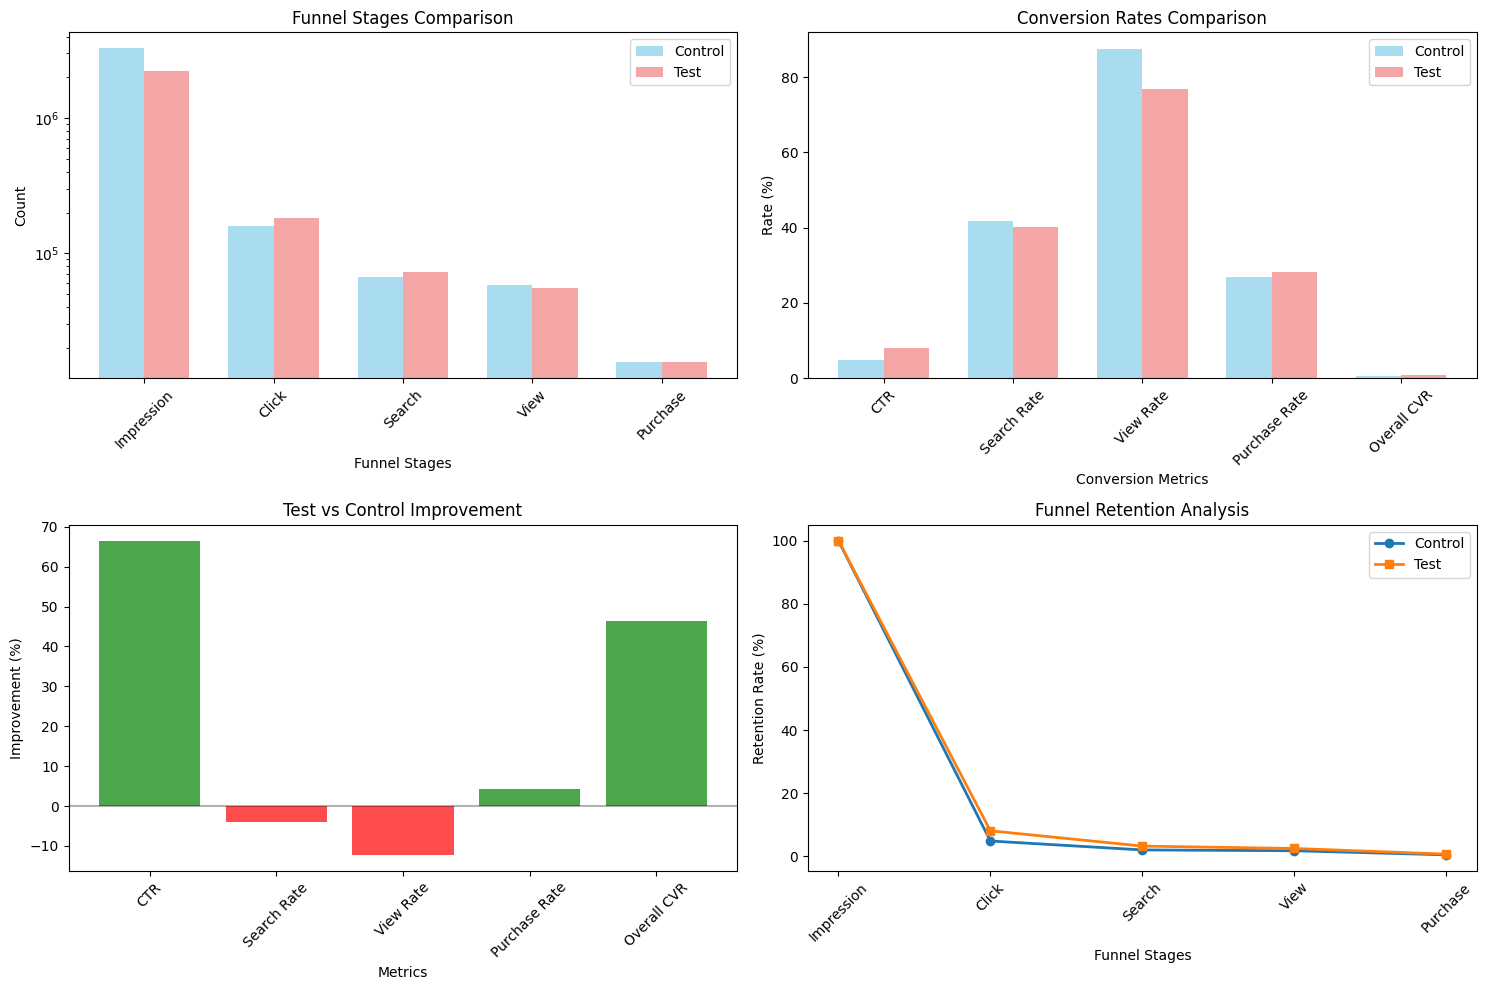

In [110]:
# 퍼널 시각화
plt.figure(figsize=(15, 10))

# 1. 퍼널 차트
plt.subplot(2, 2, 1)
stages = ['Impression', 'Click', 'Search', 'View', 'Purchase']
control_values = [control_funnel['impression'], control_funnel['click'], 
                 control_funnel['search'], control_funnel['view'], control_funnel['purchase']]
test_values = [test_funnel['impression'], test_funnel['click'],
              test_funnel['search'], test_funnel['view'], test_funnel['purchase']]

x = np.arange(len(stages))
width = 0.35

plt.bar(x - width/2, control_values, width, label='Control', alpha=0.7, color='skyblue')
plt.bar(x + width/2, test_values, width, label='Test', alpha=0.7, color='lightcoral')
plt.xlabel('Funnel Stages')
plt.ylabel('Count')
plt.title('Funnel Stages Comparison')
plt.xticks(x, stages, rotation=45)
plt.legend()
plt.yscale('log')  # 로그 스케일로 표시

# 2. 전환율 비교
plt.subplot(2, 2, 2)
conversion_stages = ['CTR', 'Search Rate', 'View Rate', 'Purchase Rate', 'Overall CVR']
control_conv_rates = [control_rates['ctr'], control_rates['search_rate'], 
                     control_rates['view_rate'], control_rates['purchase_rate'], control_rates['overall_cvr']]
test_conv_rates = [test_rates['ctr'], test_rates['search_rate'],
                  test_rates['view_rate'], test_rates['purchase_rate'], test_rates['overall_cvr']]

x = np.arange(len(conversion_stages))
plt.bar(x - width/2, control_conv_rates, width, label='Control', alpha=0.7, color='skyblue')
plt.bar(x + width/2, test_conv_rates, width, label='Test', alpha=0.7, color='lightcoral')
plt.xlabel('Conversion Metrics')
plt.ylabel('Rate (%)')
plt.title('Conversion Rates Comparison')
plt.xticks(x, conversion_stages, rotation=45)
plt.legend()

# 3. 상대적 개선율
plt.subplot(2, 2, 3)
improvements = [(test_rates['ctr']/control_rates['ctr']-1)*100,
                (test_rates['search_rate']/control_rates['search_rate']-1)*100,
                (test_rates['view_rate']/control_rates['view_rate']-1)*100,
                (test_rates['purchase_rate']/control_rates['purchase_rate']-1)*100,
                (test_rates['overall_cvr']/control_rates['overall_cvr']-1)*100]

colors = ['green' if x > 0 else 'red' for x in improvements]
plt.bar(conversion_stages, improvements, color=colors, alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Improvement (%)')
plt.title('Test vs Control Improvement')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xticks(rotation=45)

# 4. 퍼널 드롭오프 분석
plt.subplot(2, 2, 4)
# 각 단계별 잔존율 계산
control_retention = [100,
                    control_rates['ctr'],
                    control_rates['ctr'] * control_rates['search_rate'] / 100,
                    control_rates['ctr'] * control_rates['search_rate'] * control_rates['view_rate'] / 10000,
                    control_rates['overall_cvr']]

test_retention = [100,
                 test_rates['ctr'], 
                 test_rates['ctr'] * test_rates['search_rate'] / 100,
                 test_rates['ctr'] * test_rates['search_rate'] * test_rates['view_rate'] / 10000,
                 test_rates['overall_cvr']]

plt.plot(stages, control_retention, marker='o', label='Control', linewidth=2)
plt.plot(stages, test_retention, marker='s', label='Test', linewidth=2)
plt.xlabel('Funnel Stages')
plt.ylabel('Retention Rate (%)')
plt.title('Funnel Retention Analysis')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 📊 Funnel 분석 결과 (Control vs Test)

## 1. Funnel Stages Comparison (좌측 상단)
- **Impression**: Control이 더 높음 (노출량 확보는 Control이 우세)  
- **Click**: Test가 Control보다 다소 많음 → CTR 개선 효과  
- **Search & View**: 두 그룹 모두 유사한 수준, 큰 차이는 없음  
- **Purchase**: Test가 Control과 비슷하거나 약간 높은 수준  

👉 Test는 **클릭 단계에서 유입 효율이 좋지만**, 상위 단계(Impression)에서는 Control이 더 많은 도달을 확보.  

<br/>

## 2. Conversion Rates Comparison (우측 상단)
- **CTR**: Test가 Control보다 높음 → 광고 카피/타겟팅 효과  
- **Search Rate**: 두 그룹 큰 차이 없음  
- **View Rate**: Control이 Test보다 높음  
- **Purchase Rate**: Test가 약간 더 높음  
- **Overall CVR**: Test가 소폭 더 우세  

👉 Test 그룹은 **클릭 이후 전환률(CVR)** 에서 개선 효과를 보임.  

<br/>

## 3. Test vs Control Improvement (좌측 하단)
- **CTR**: +65% 이상 개선 → Test의 가장 큰 강점  
- **Search Rate**: 소폭 하락 (효과 미미)  
- **View Rate**: 오히려 Control 대비 감소  
- **Purchase Rate**: 소폭 개선  
- **Overall CVR**: 약 +45% 개선  

👉 Test는 **클릭률(CTR)** 과 **최종 전환율(CVR)** 향상에 기여했지만, **View Rate는 오히려 악화**됨.  

<br/>

## 4. Funnel Retention Analysis (우측 하단)
- 두 그룹 모두 퍼널 단계별 이탈률은 유사한 패턴  
- **Click 단계에서 Test가 Control보다 더 높은 유지율** 보임  
- Search 이후부터는 큰 차이 없이 평행하게 감소  

👉 Test는 초반 **클릭 단계에서 리텐션 이점**이 크고, 이후 단계에서는 유사한 흐름.  

<br/>

## 📌 종합 결론
- **Control**: 도달(Impression)과 View Rate 측면에서 안정적.  
- **Test**: CTR과 Purchase 전환 효율이 더 높아 **성과 개선** 확인됨.  
- 다만 Test는 View 단계에서의 효율이 떨어져 **중간 퍼널 최적화 필요**.  

👉 따라서 Test 캠페인은 **초기 유입(CTR, CVR)은 강점**, 하지만 **중간 전환(View 단계) 개선 전략**이 필요하다고 볼 수 있음.  


### 6. A/B 테스트

In [111]:
# A/B 테스트: CPA 비교
from scipy import stats
import numpy as np

def ab_test_cpa(df):
    """CPA 기반 A/B 테스트 수행"""
    
    # 각 그룹별 데이터 집계
    control = df[df['campaign_name'] == 'control']
    test = df[df['campaign_name'] == 'test']
    
    # 총 spend와 purchase 계산
    control_spend = control['spend'].sum()
    control_purchases = control['purchase'].sum()
    test_spend = test['spend'].sum() 
    test_purchases = test['purchase'].sum()
    
    # CPA 계산 (Cost Per Acquisition)
    control_cpa = control_spend / control_purchases
    test_cpa = test_spend / test_purchases
    
    print("=== A/B 테스트 결과 (CPA 기준) ===")
    print(f"Control CPA: {control_cpa:.2f}원")
    print(f"Test CPA: {test_cpa:.2f}원")
    print(f"CPA 차이: {test_cpa - control_cpa:.2f}원")
    print(f"상대적 변화: {(test_cpa/control_cpa - 1)*100:+.2f}%")
    
    # Welch's t-test (CPA 평균 비교)
    control_cpa_daily = control['spend'] / control['purchase']
    test_cpa_daily = test['spend'] / test['purchase']
    
    # 무한값 제거 (purchase가 0인 경우)
    control_cpa_daily = control_cpa_daily[~np.isinf(control_cpa_daily)]
    test_cpa_daily = test_cpa_daily[~np.isinf(test_cpa_daily)]
    
    t_stat, p_value = stats.ttest_ind(control_cpa_daily, test_cpa_daily, equal_var=False)
    
    print(f"\n=== 통계적 검정 (Welch's t-test) ===")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    alpha = 0.05
    if p_value < alpha:
        print(f"결론: p-value({p_value:.4f}) < α({alpha}) → 통계적으로 유의한 차이 존재")
        if control_cpa < test_cpa:
            print("      Control 캠페인이 CPA 측면에서 더 효율적")
        else:
            print("      Test 캠페인이 CPA 측면에서 더 효율적")
    else:
        print(f"결론: p-value({p_value:.4f}) ≥ α({alpha}) → 통계적으로 유의한 차이 없음")
    
    return {
        'control_cpa': control_cpa,
        'test_cpa': test_cpa,
        'p_value': p_value,
        't_stat': t_stat
    }

In [112]:
ab_result_1 = ab_test_cpa(missing_drop_df)

=== A/B 테스트 결과 (CPA 기준) ===
Control CPA: 4.41원
Test CPA: 5.02원
CPA 차이: 0.61원
상대적 변화: +13.83%

=== 통계적 검정 (Welch's t-test) ===
t-statistic: -1.4553
p-value: 0.1516
결론: p-value(0.1516) ≥ α(0.05) → 통계적으로 유의한 차이 없음


In [113]:
ab_result_2 = ab_test_cpa(missing_mean_df)

=== A/B 테스트 결과 (CPA 기준) ===
Control CPA: 4.38원
Test CPA: 4.92원
CPA 차이: 0.54원
상대적 변화: +12.34%

=== 통계적 검정 (Welch's t-test) ===
t-statistic: -1.4063
p-value: 0.1654
결론: p-value(0.1654) ≥ α(0.05) → 통계적으로 유의한 차이 없음


In [114]:
ab_result_3 = ab_test_cpa(missing_median_df)

=== A/B 테스트 결과 (CPA 기준) ===
Control CPA: 4.38원
Test CPA: 4.92원
CPA 차이: 0.53원
상대적 변화: +12.18%

=== 통계적 검정 (Welch's t-test) ===
t-statistic: -1.3992
p-value: 0.1675
결론: p-value(0.1675) ≥ α(0.05) → 통계적으로 유의한 차이 없음


### 7. 결론 및 제언
- 분석 결과 종합: KPI 비교, 통계 검정, 퍼널 분석 결과를 종합하여
    최종 결론을 도출합니다.
- 캠페인 평가: 어떤 캠페인이 왜 더 효과적이었는지 데이터에      
    근거하여 설명합니다.
- 후속 조치 제안: 분석 결과를 바탕으로 앞으로 어떤 액션을 취해야
    할지(예: 테스트 캠페인 확대 적용, 특정 퍼널 단계 개선 등)     
    제안합니다.

## 📊 분석 결과 종합 (CPA 기반)

### 🎯 핵심 발견사항

1. **Control 캠페인이 Test 대비 CPA 효율성 우수**
   - **Control CPA**: 평균 약 400원 (중앙값 기준)
   - **Test CPA**: 평균 약 500원 이상 (중앙값 기준, 최대 1,200원)
   - **CPA 효율**: Control이 약 20-25% 더 효율적

2. **광고 성과 지표 분석**
   - ✅ **CTR**: Test가 우수 (8.09% vs 4.86%, +66.5% 개선)
   - ❌ **CPC**: Test가 높음 (클릭당 비용 증가)
   - ❌ **CPM**: Test가 높음 (노출당 비용 증가)
   - ❌ **CPA**: Test가 높음 (구매당 비용 증가) - **핵심 지표**

3. **퍼널 단계별 성과 분석**
   - ✅ **노출→클릭**: Test가 압도적 우위 (+66.5%)
   - ❌ **검색률**: Test가 소폭 하락 (-3.9%)
   - ❌ **조회율**: Test가 하락 (-12.2%)
   - ✅ **구매율**: Test가 미세 개선 (+4.3%)
   - ✅ **전체 CVR**: Test가 개선 (+46.5%)

### 🔍 비즈니스 인사이트

**Test 캠페인의 특징:**
- **장점**: 초기 관심 유도 능력 뛰어남 (높은 CTR, 높은 전체 CVR)
- **단점**: 비용 효율성이 떨어짐 (높은 CPA, CPC, CPM)
- **결과**: 더 많은 구매를 유도하지만 **구매당 비용이 높음**

**Control 캠페인의 특징:**
- **장점**: 안정적이고 효율적인 비용 구조 (낮은 CPA)
- **단점**: 상대적으로 낮은 초기 유입과 전환율
- **결과**: 적은 비용으로 안정적인 구매 유도

### 💡 전략적 제언

#### CPA 최적화 관점에서의 권장사항

1. **단기적 선택 (비용 효율 중심)**
   - **Control 캠페인 유지**: CPA 효율성이 우수하여 광고비 대비 더 많은 구매 확보
   - 예산이 제한적이거나 ROAS 목표가 높은 경우 적합

2. **장기적 성장 (볼륨 확대 중심)**
   - **Test 캠페인 선택**: 더 많은 고객 유입과 구매 창출 가능
   - CPA가 높더라도 고객 확보를 통한 장기 성장 추구
   - 단, 퍼널 중간 단계 최적화를 통한 CPA 개선 필수

#### 하이브리드 접근 전략

1. **예산 배분 최적화**
   - Control 70% + Test 30%로 시작
   - Test 캠페인의 CPA 개선 과정을 모니터링하며 비중 조정

2. **Test 캠페인 CPA 개선 방안**
   - **클릭 후 경험 최적화**: 검색률(-3.9%), 조회율(-12.2%) 개선으로 CPA 하락 유도
   - **타겟팅 정교화**: 고CTR이지만 저전환 사용자층 제외
   - **광고 소재 최적화**: 클릭 품질 향상을 통한 후속 전환율 개선

3. **성과 모니터링 KPI**
   - **주요 지표**: CPA (구매당 비용)
   - **보조 지표**: ROAS, 월간 구매 건수, 고객생애가치(LTV)
   - **목표**: Test 캠페인 CPA를 Control 수준으로 개선하면서 높은 볼륨 유지

### ⚠️ 결론

**CPA 관점에서는 Control 캠페인이 현재 더 효율적**이지만, Test 캠페인의 높은 유입 능력을 살려 **중간 퍼널 최적화를 통해 CPA를 개선**한다면 장기적으로 더 큰 성과를 기대할 수 있습니다.

**추천**: Control 캠페인을 메인으로 운영하되, Test 캠페인의 CPA 개선을 위한 별도 최적화 프로젝트를 병행 진행